# Intro to Cartopy

Cartopy is a Python package that provides easy creation of maps with matplotlib.

## Cartopy vs Basemap

* Cartopy is replacing Basemap, which is nearing its [end-of-life in 2020](https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement). All new software development should try to use Cartopy whenever possible.
* Cartopy is better integrated with matplotlib and in a more active development state, supported by the UK Met Office 
* Proper handling of datelines in Cartopy - one of the bugs in basemap (example: [Challenger circumnavigation](http://ocefpaf.github.io/python4oceanographers/blog/2013/09/23/cartopy/))
* Cartopy offers powerful vector data handling by integrating shapefile reading with Shapely capabilities
* Cartopy now has support for gridlines on all plots as of May 2020
* Basemap has a map scale bar feature (can be [buggy](https://github.com/matplotlib/basemap/issues/165)); still [not implemented](https://github.com/SciTools/cartopy/issues/490) in cartopy, but there are some messy [workarounds](http://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot)

Cartopy uses `matplotlib.pyplot` in order to plot maps. Therefore, we need to import that, as well as `cartopy` and cartopy's `crs` (coordinate reference system) submodule. These are typically imported as follows:

In [1]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

## Creating GeoAxes

* Cartopy-matplotlib interface is set up via the `projection` keyword when constructing `Axes` / `SubAxes`
* The resulting instance (`cartopy.mpl.geoaxes.GeoAxesSubplot`) has new methods specific to drawing cartographic data, e.g. **coastlines**:

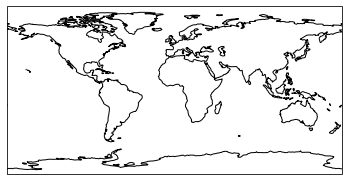

In [2]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

In [3]:
print('axes type:', type(ax))

axes type: <class 'cartopy.mpl.geoaxes.GeoAxesSubplot'>


Here we are using a Plate Carrée projection, which is one of the *equidistant cylindrical projections*.

A full list of Cartopy projections is available at http://scitools.org.uk/cartopy/docs/latest/crs/projections.html.

Map projections induce some strong opinions in people ([obligatory xkcd](https://xkcd.com/977/)). Always consider the map projections that you choose for your project. All projections distort, but some are more suited to certain tasks. See links at the bottom of this notebook for more information about projections.

An example of few projections below:

![](../figures/map_projections.png)

## Putting georeferenced data on a map

* Use the standard matplotlib plotting routines with an additional `transform` keyword.
* The value of the `transform` argument should be the cartopy coordinate reference system *of the data being plotted*. This will typically be Plate Carrée as, under this projection, any point's location in longitude and latitude is simply its coordinates in the x-y plane.

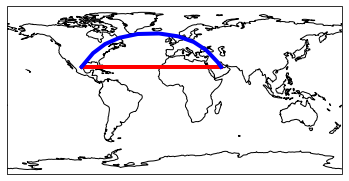

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.plot([-100, 50], [25, 25], linewidth=4, color='r', transform=ccrs.PlateCarree())
plt.plot([-100, 50], [25, 25], linewidth=4, color='b', transform=ccrs.Geodetic())
plt.show()

Notice that unless we specify a map extent (we did so via the ``set_global`` method in this case) the map will zoom into the range of the plotted data.

## Decorating maps

We can add grid lines and tick labels to the map using the `gridlines()` method:

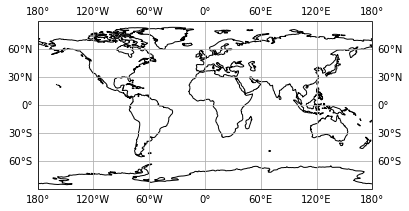

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.show()

Grid lines are not restricted to rectangular plots, all Cartopy projections now accept gridlines:

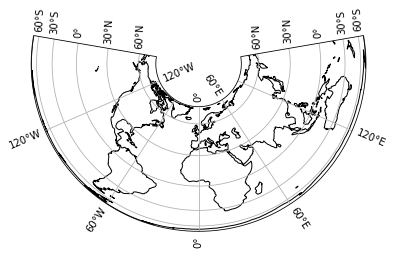

In [6]:
ax = plt.axes(projection=ccrs.AlbersEqualArea())
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.show()

We can control the specific tick values by using matplotlib's locator object, and the formatting can be controlled with matplotlib formatters:

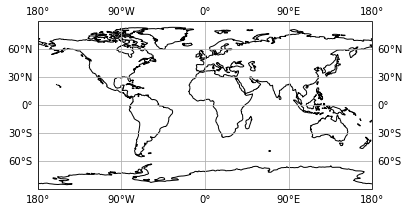

In [7]:
import matplotlib.ticker as mticker

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)

gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])

plt.show()

## Exercise
Experiment with the following code cell to produce a map:
- Uncomment lines to use their functionality
- Try changing the coordinate reference system (check the list of them [here](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html))
- Change the plot limits and tick locations

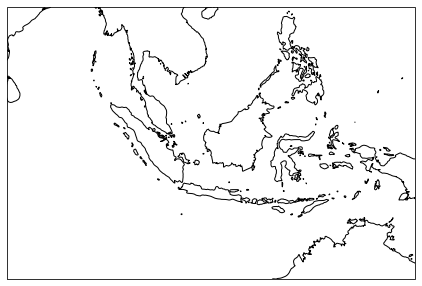

In [8]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set(xlim=[80,140], ylim=[-20,20], transform=ccrs.PlateCarree() )
ax.coastlines()

# gl = ax.gridlines(draw_labels=True)
# gl.xlocator = mticker.FixedLocator([90, 110, 130])
# ax.stock_img()

plt.show()

## Inbuilt Feautures
Cartopy has inbuilt functionality to plot coastlines, national boundaries, lakes, rivers and more ([documentation here](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html)).

All of these features come in three scales ‘10m’, ‘50m’, or ‘110m’. Corresponding to 1:10,000,000, 1:50,000,000, and 1:110,000,000. `10m` offers the highest resolution, but is slower to plot:

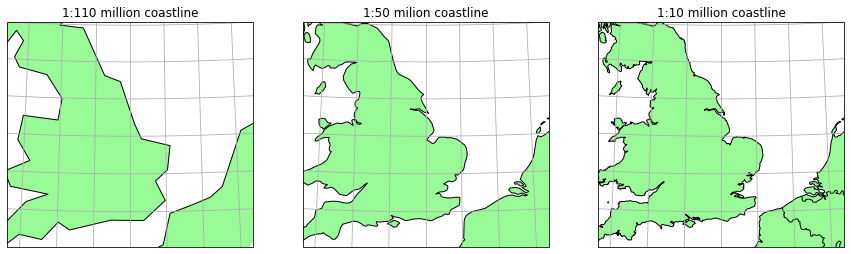

In [9]:
# Generate the coastline feature at three different scales
land_110m = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '110m',
                                        edgecolor='k', facecolor='palegreen')
land_50m = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='k', facecolor='palegreen')
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '10m',
                                        edgecolor='k', facecolor='palegreen')

# Make 3 geoaxes by using subplots with subplot_kw to specify the projection
fig, axs = plt.subplots(ncols=3, figsize=(15,6),subplot_kw={'projection': ccrs.AlbersEqualArea()})
axs = axs.ravel()

# Add coastlines of varying scale to the three axes
axs[0].add_feature(land_110m)
axs[1].add_feature(land_50m)
axs[2].add_feature(land_10m)

axs[0].set_title("1:110 million coastline")
axs[1].set_title("1:50 milion coastline")
axs[2].set_title("1:10 million coastline")

# Add national borders to the final axes and gridlines to all axes
axs[2].add_feature(cartopy.feature.BORDERS)
for ax in axs:
    gl = ax.gridlines(draw_labels=False)
    ax.set_extent([-5, 5, 50, 56], crs=ccrs.PlateCarree());
    
# Note that the limits of the plot are set using PlateCarree
plt.show()

## Plotting layers directly from Web Map Service (WMS) and Web Map Tile Service (WMTS)

C:\Users\tams00\AppData\Local\mambaforge\envs\course2022\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "1" already exists
  warnings.warn(msg, RuntimeWarning)
C:\Users\tams00\AppData\Local\mambaforge\envs\course2022\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "2" already exists
  warnings.warn(msg, RuntimeWarning)
C:\Users\tams00\AppData\Local\mambaforge\envs\course2022\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "3" already exists
  warnings.warn(msg, RuntimeWarning)
C:\Users\tams00\AppData\Local\mambaforge\envs\course2022\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "4" already exists
  warnings.warn(msg, RuntimeWarning)
C:\Users\tams00\AppData\Local\mambaforge\envs\course2022\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "5" already exists
  warnings.warn(msg, RuntimeWarning)


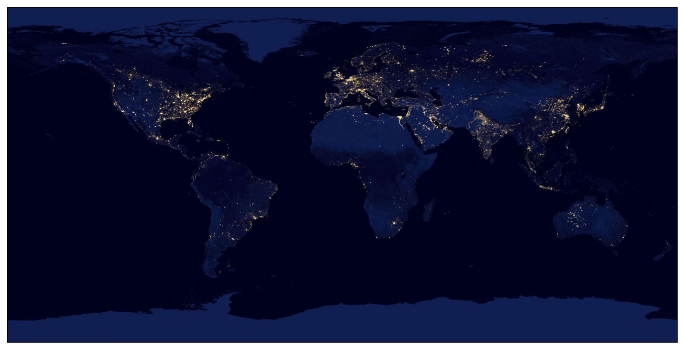

In [10]:
url = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
fig = plt.figure(figsize=(12, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_wmts(url, 'VIIRS_CityLights_2012');

## Reminder: Cartopy is based on matplotlib

Consequentially, most plotting functions available in matplotlib can be reproduced with Cartopy. Usually, this is achieved by calling the plotting method with the **transform** keyword argument to inform matplotlib of the coordinate system of the data you are plotting. This will typically be Plate Carrée:

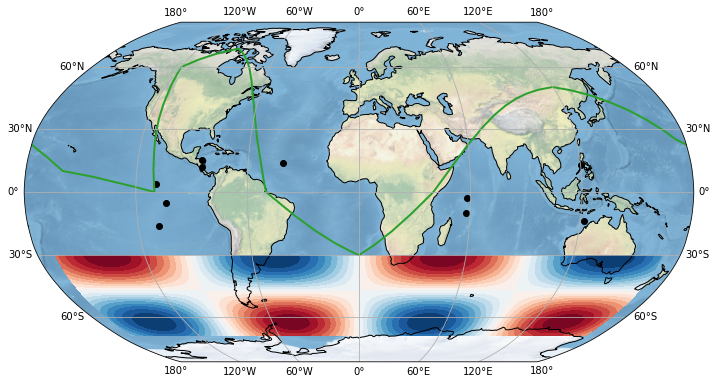

In [11]:
import numpy as np

# Plot a basic global map
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
ax.gridlines(draw_labels=True)
ax.stock_img()
# Add some scatter points
lon_0 = np.random.randint(low=-180, high=180, size=10)
lat_0 = np.random.randint(low=-20, high=20, size=10)
ax.scatter(lon_0, lat_0, color='k', transform = ccrs.PlateCarree())

# Add a circumnavigating line following the geodetic (great circle) line between points
ax.plot([-120, -90, -50, 0, 40, 120, 175, 200, 250, -120],
        [60, 70, 0, -30, 0, 50, 25, 10, 0, 60],
        linewidth=2, color='C2', transform=ccrs.Geodetic())


# Add a countour plot
x1, y1 = np.meshgrid(np.linspace(-170,170,100), np.linspace(-70,-30,100))
z1 = np.sin(x1/30) * np.cos(y1/10)
ax.contourf(x1,y1,z1, 20, cmap='RdBu', transform=ccrs.PlateCarree())

plt.show()

## Challenge
Make a map of Europe with the capital cities marked, a flight path from Norwich to Beijing and some bathymetry from the Mediterranean.

#### Hints:
- Make use the land feature we created previously
- Use a scatter plot for the capitals
- The flight path between Norwich and Beijing should be a great circle path
- The bathymetry in the Mediterranean can be added with contourf and needs an appropriate colour map

![](../figures/europe_map.png)

In [12]:
capital_lat, capital_lon = np.loadtxt('../data/capital_locs.csv', skiprows=1, delimiter=',', usecols=(2,3), unpack=True)

norwich_beijing_lat = [52.630535, 39.904211]
norwich_beijing_lon = [1.297250, 116.407395]

import xarray as xr # More on this bit with Jenny tomorrow
bathy_ds = xr.open_dataset('../data/bathy_subset.nc')
bathy_lon, bathy_lat, bathy_h = bathy_ds.bathymetry.longitude, bathy_ds.bathymetry.latitude, bathy_ds.bathymetry.values


In [13]:
# Your code here

Scroll down for a sample solution

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.




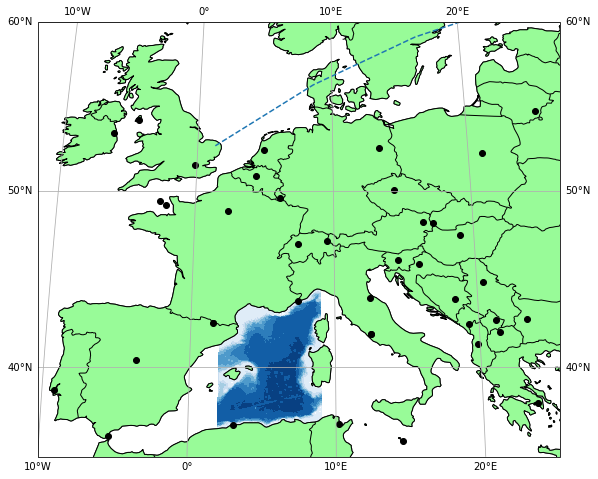

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=7.5))
ax.coastlines()
ax.add_feature(land_50m)
ax.add_feature(cartopy.feature.BORDERS)

ax.set_extent([-10, 25, 35, 60], crs=ccrs.PlateCarree());

ax.scatter(capital_lon[capital_lat<55], capital_lat[capital_lat<55], color='k', transform=ccrs.PlateCarree(), zorder=2)

ax.plot(norwich_beijing_lon, norwich_beijing_lat, linestyle='--', transform=ccrs.Geodetic())

ax.contourf(bathy_lon, bathy_lat, bathy_h, 20, vmin=-3200, vmax=200, cmap='Blues_r', transform=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlocator = mticker.FixedLocator([-10, 0,10, 20])
gl.ylocator = mticker.FixedLocator([40, 50,60])
#plt.savefig('../figures/europe_map.png')

# Bonus section: high definition shapefiles

If you plan to work at very small scales (sub km), the inbuilt coastlines will not be sufficiently detailed. Instead you can get some from [Open Street Map](https://osmdata.openstreetmap.de/download/land-polygons-split-4326.zip) and plot them with cartopy. For details on how to subset the shapefiles to your region of interest so they don't take all day to plot, see [here](
https://gis.stackexchange.com/questions/6019/cutting-up-a-shapefile-into-smaller-parts?rq=1
). Here's how they look.

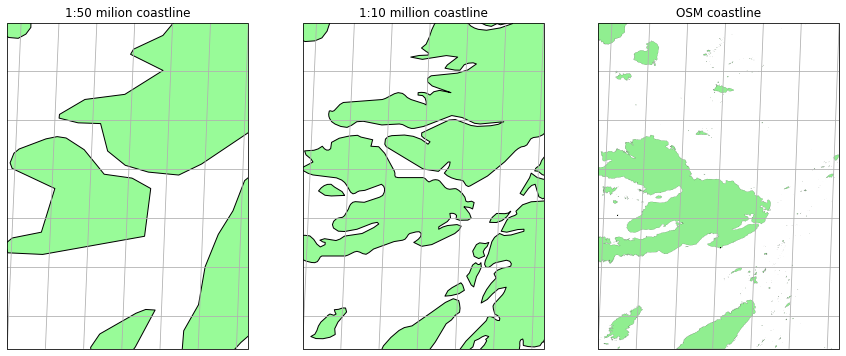

In [15]:
land_110m = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '110m',
                                        edgecolor='k', facecolor='palegreen')
land_50m = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='k', facecolor='palegreen')
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '10m',
                                        edgecolor='k', facecolor='palegreen')

# Make 3 geoaxes by using subplots with subplot_kw to specify the projection
fig, axs = plt.subplots(ncols=3, figsize=(15,6),subplot_kw={'projection': ccrs.Robinson()})
axs = axs.ravel()

# Add coastlines of varying scale to the three axes
axs[0].add_feature(land_50m)
axs[1].add_feature(land_10m)

from cartopy.io import shapereader
shp = shapereader.Reader('../data/coasts/hidf_land.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    axs[2].add_geometries([geometry], ccrs.PlateCarree(), facecolor='lightgreen', edgecolor='black', linewidth=0.1)

axs[0].set_title("1:50 milion coastline")
axs[1].set_title("1:10 million coastline")
axs[2].set_title("OSM coastline")

for ax in axs:
    gl = ax.gridlines(draw_labels=False)
    ax.set_extent([-6.3, -5.4, 56, 57], crs=ccrs.PlateCarree());
    
plt.savefig('../figures/scot_coast.png')

## References
- Some discussion on projections https://source.opennews.org/articles/choosing-right-map-projection/
- How to choose a projection http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/map%20coordinate%20systems/how%20to%20choose%20a%20projection.htm
- Lon and lat of capital cities taken from https://www.jasom.net/list-of-capital-cities-with-latitude-and-longitude/